<a href="https://colab.research.google.com/github/Midmost/Midmost.github.io/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to Perform K-Means Clustering in Python**

### Understanding the K-Means Algorithm
.

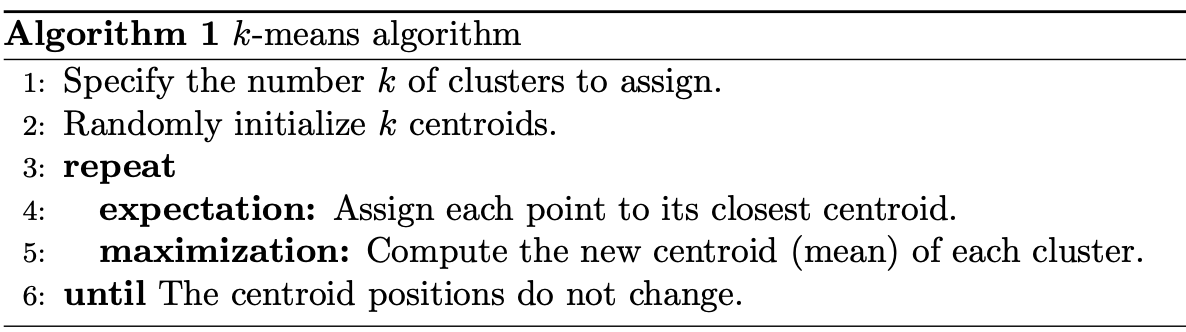

After the centroids **converge**

-> Nondeterministic

*SSE : 모든 점들로부터 중심까지의 거리합(루트안씌워)

### Writing Your First K-Means Clustering Code in Python



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
!pip install kneed

from kneed import KneeLocator
from sklearn.datasets import make_blobs #함수, n개의 무작위 데이터 클러스터 생성 
# https://cyan91.tistory.com/38 설명이 기깔난걸!

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# https://ariz1623.tistory.com/224 
from sklearn.preprocessing import StandardScaler




---


make_blobs() parameters:

* n_samples 만들 샘플 총 개수
* centers 만든거 center들의 수
* cluster_std 표준편차

make_blobs() returns:

(tuple)

.
 
1. x- and y-values
2. cluster labels

In [ ]:
features, true_labels = make_blobs(
     n_samples=200,
     centers=3,
     cluster_std=2.75,
     random_state=42
 )

k-means같은 Nondeterministic 알고리즘은 재생산 힘들어서(아마 숫자 바뀔까봐) 튜토리얼에서만 random_state를 int로 하는거야 

실제로는 None으로 해놓아라

In [ ]:
features[:5]

In [ ]:
true_labels[:5]

* 데이터셋의 어떤 feature가 중유한지는 그 feature 값들의 다양성이 클수록 머신러닝은 더 중요하게 
여길거야

ex) height과 weight 중 보통 키보다는 무게가 더 값이 크고 높은 다양성을 가지기에 머신러닝에서는 weight이 더 중요 

* 모든 feature들을 동등하게 보기 때문에 반드시 같은 scale로 transform해야해

-> 이거를 feature scaling 이라해. 얘도 preprocessing 단계에 해당하고 
댜부분의 distance-based 머신러닝에서 개중요해. 

다양한 방법이 있는데 이 튜토리얼에서는 StandardScaler 쓸거야. 
이 class는 standardization이라는 feature scaling 타입을 구현해.

요거를 쓰면! 평균은 0이 되고 표준편차는 1로 데이터셋이 세팅된댜!!(nemerical feature들만)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Take a look at how the values have been scaled in scaled_features:

scaled_features[:5]

....? 봐도 모르겠닼ㅋㅋㅋㅋ 수가 뭔가 0에 가까워진건 알곘는데 끄응....시각화 절실하다...


---



The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. 

B is where s v :

 B는 s가 v하는 곳이다 로 해석하자

 ---

 K-means parameters:

 * init : random하게 초기값을 정하는거, default로 k-means++을 쓰고 random_sampling을 쓸 수오 있어

 * n_clusters : 가장 중요한 매개변수! k를 설정하는 거

 * n_init : 수행할 초기화의 갯수를 설정, default 10개 

 * max_iter : 최대 반복횟수 설정 

In [ ]:
# K-means class is ready!

kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
# fit으로 호출하면 이제 sse를 속성처럼 사용가능!
kmeans.fit(scaled_features)

In [ ]:
# The lowest SSE value
kmeans.inertia_

# Final locations of the centroid
kmeans.cluster_centers_

# The number of iterations required to converge
# 수렴하기 위해 요구되는 반복횟수

kmeans.n_iter_

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:

In [ ]:
kmeans.labels_[:5]

### Choosing the Appropriate Number of Clusters

clusters의 수각 적절한가? 아래 두 가지 방법으로 확인 ㄱㄱ

1. The elbow method
2. The silhouette coeffeicient

둘 다 많이 쓰임

#### **The elbow method**

In [ ]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

Python’s dictionary unpacking operator (**)


In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
# https://frhyme.github.io/python-lib/plt_xticks/
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show

In [ ]:
kl = KneeLocator(
    range(1,11), sse, curve='convex', direction='decreasing'
)

kl.elbow

#### **The silhouette coefficient**

1. 클러스터 안에서 서로 얼마나 가까운가
2. 다른 클러스트의 포인트들과 얼마나 먼 가

실루엣은 -1부터 1까지고 클수록 다른 클러스터 보다 같은 클러스터내 자기들끼리 가깝다

silhouette score()는 최소 2개의 클러스터를 필요로 한다. 안그러면 예외발생!

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
# https://frhyme.github.io/python-lib/plt_xticks/
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show

### Evaluating Clustering Performance Using Advanced Techniques

ground truth labels

이게 뭐냐면 멀리서 전체를 봤을 때 어림짐작하는 거여 근데 흐릿한 시야로 보니 좀 부정확할 수도 있는! 그런거야 그리고 현실세계에서 ground truth labels를 포함한 데이터셋을 만날 기회는 매우 희귀!

이걸 쓰는 이유는 nonsperical한 cluster들을 다룰때 elbow 나 silhouette coefficientsms 는 인간의 직관과 맞지 않아! 그래서 지금부터 하는 거는 사실 지금 내가...봐도 되나? 싶긴한데! 

In [ ]:
# This time, use make_moons() to generate synthetic data

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [ ]:
features, ture_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [ ]:
# Instantiate k-means and dbscan algorithms

kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
